Virtual Acoustics and Immersive Audio Workshop - CCRMA Stanford University  
23.07.25 - Orchisama Das, Gloria Dal Santo
  
### L03: Artificial Reverberation with Delay Networks

In this assignment we will 
- Create a Feedback Delay Network
- Generate various orthogonal feedback matrices: identity, random orthogonal, Hadamard, Householder (See [Table](https://dafx2020.mdw.ac.at/proceedings/papers/DAFx2020_paper_53.pdf)).
- Implement time-domain processing for mono input/output with any number of delay lines.
- Process the anechoic signals from Assignment 2 with the FDN. Use an impulse to hear the impulse response.
- Modify FDN parameters and size; observe and listen to how they affect the output.

In [1]:
# --- Imports ---
import numpy as np
import IPython.display as ipd

from pathlib import Path
from room_acoustics.fdn import FeedbackDelayNetwork

from utils import audioread
from room_acoustics.plot import plot_time_domain

#### 1. Create a Feedback Delay Network

Head to `room_acoustics.fdn`, you will find a partially coded class `FeedbackDelayNetwork`. You will have to
- 1.1 Complete the `get_feedback_matrix` method that generates the feedback matrix based on the specified type. 
- 1.2 Complete the `process` function that perform time domain processing of an input signal through the FDN
- 1.3 In the cell below, generate and impulse signal and process it with the FDN to obtain the synthetic RIR. 
- 1.4 Process the dry signals `data/Drums.wav`, `data/Sax.wav`, and `data/Speech.wav`. 

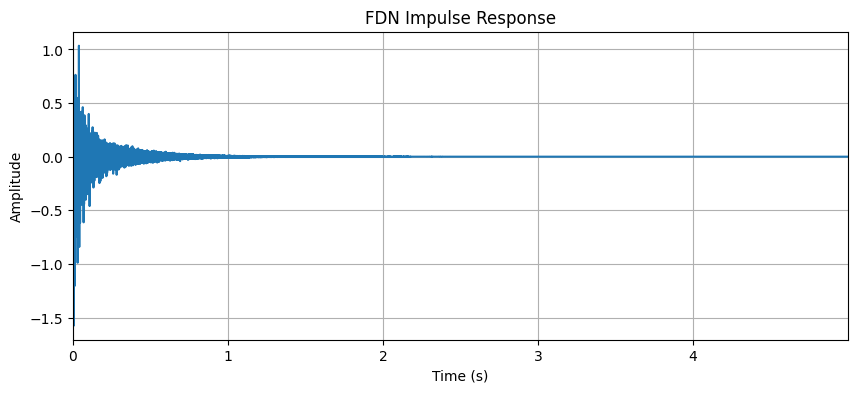

In [ ]:
# --- FDN Impulse Response ---
fs = 48000
fdn = FeedbackDelayNetwork(
    sample_rate = fs,
    delay_lengths=[809, 877, 937, 1049, 1151, 1249, 1373, 1499],
    #delay_lengths=[241, 263, 281, 293, 1193, 1319, 1453, 1597],
    feedback_matrix_type='hadamard',
    t60 = 2.0
)

### WRITE YOUR CODE HERE ###
# generate an impulse signal
input_signal = np.zeros(int(5 * fs))
input_signal[0] = 1.0

fdn.process(input_signal)
plot_time_domain(fdn.output, fs=fs, title='FDN Impulse Response')
ipd.display(ipd.Audio(fdn.output, rate=fs))

#### 2. Process Anechoic Signals 

Process the dry signals `data/Drums.wav`, `data/Sax.wav`, and `data/Speech.wav`. 

In [13]:
# --- Process Anechoic Sounds with the FDN ---
anechoic = ['Drums', 'Sax', 'Speech']

for filename in anechoic:
    rec_path = Path('/Users/gpapadim/Documents/VAIAWorkshop25Public') / 'data' / f'{filename}.wav'
    rec, fs = audioread(str(rec_path))
    fdn.process(rec)

    print(f"{filename}")
    ipd.display(ipd.Audio(fdn.output, rate=fs))


Drums


Sax


Speech


#### 3. Try different parameters! 

You can try different combinations of parameters: 
- Change the size of the FDN. What is a good sounding size? 
- Change the type of feedback matrix and the length of the delay lines.
- If you have time, you can try to implement a simple first order low pass filer instead of the homogenous loss. 